In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

In [50]:
df = pd.read_excel('/Users/praveenzirali/active_projects/crcsim/crcsim/experiment/summary/summarized_2.xlsx', sheet_name='All Columns')

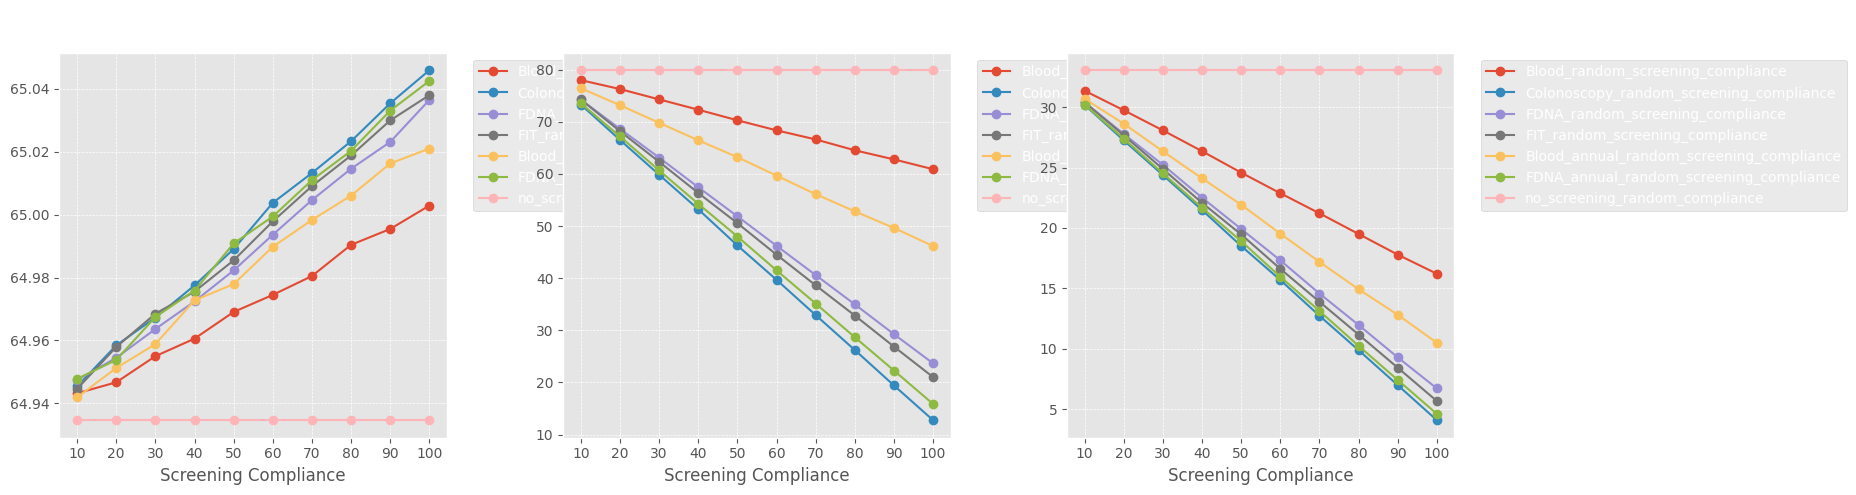

<Figure size 640x480 with 0 Axes>

In [57]:
# Define the screening scenarios
screening_scenarios = [
    'Blood_random_screening_compliance', 'Colonoscopy_random_screening_compliance',
    'FDNA_random_screening_compliance', 'FIT_random_screening_compliance', 
    'Blood_annual_random_screening_compliance', 'FDNA_annual_random_screening_compliance', 'no_screening_random_compliance'
]

# Define the variables to plot
variables = [
    'discounted_lifeobs_if_unscreened_undiagnosed_at_40_mean',
    'clin_crc_per_1k_40yo_mean',
    'deadcrc_per_1k_40yo_mean'
]

# Create a figure and axis objects
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Create a custom range of compliance levels
compliance_levels = np.arange(10, 101, 10)

# Define the graph titles
graph_titles = ['Life years saved', 'CRC Incidence', 'CRC deaths']

# Loop over the variables
for i, (ax, var, title) in enumerate(zip(axes, variables, graph_titles)):
    # Extract the relevant data
    data = df[df['scenario'].str.contains('|'.join(screening_scenarios))]

    # Plot the data
    for scenario in screening_scenarios:
        scenario_data = data[data['scenario'].str.contains(scenario)]
        scenario_compliance_levels = [float(s.split('_')[-1]) for s in scenario_data['scenario']]
        ax.plot(compliance_levels, np.interp(compliance_levels, scenario_compliance_levels, scenario_data[var]), marker='o', label=scenario)
    ax.set_xticks(compliance_levels)
    ax.set_title(title, fontsize=14, pad=20)  # Add title to the top of each graph
    ax.set_xlabel('Screening Compliance')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True, linestyle='--', linewidth=0.5)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)
plt.figure(facecolor='white')
plt.style.use('ggplot')
# Display the plot
plt.show()

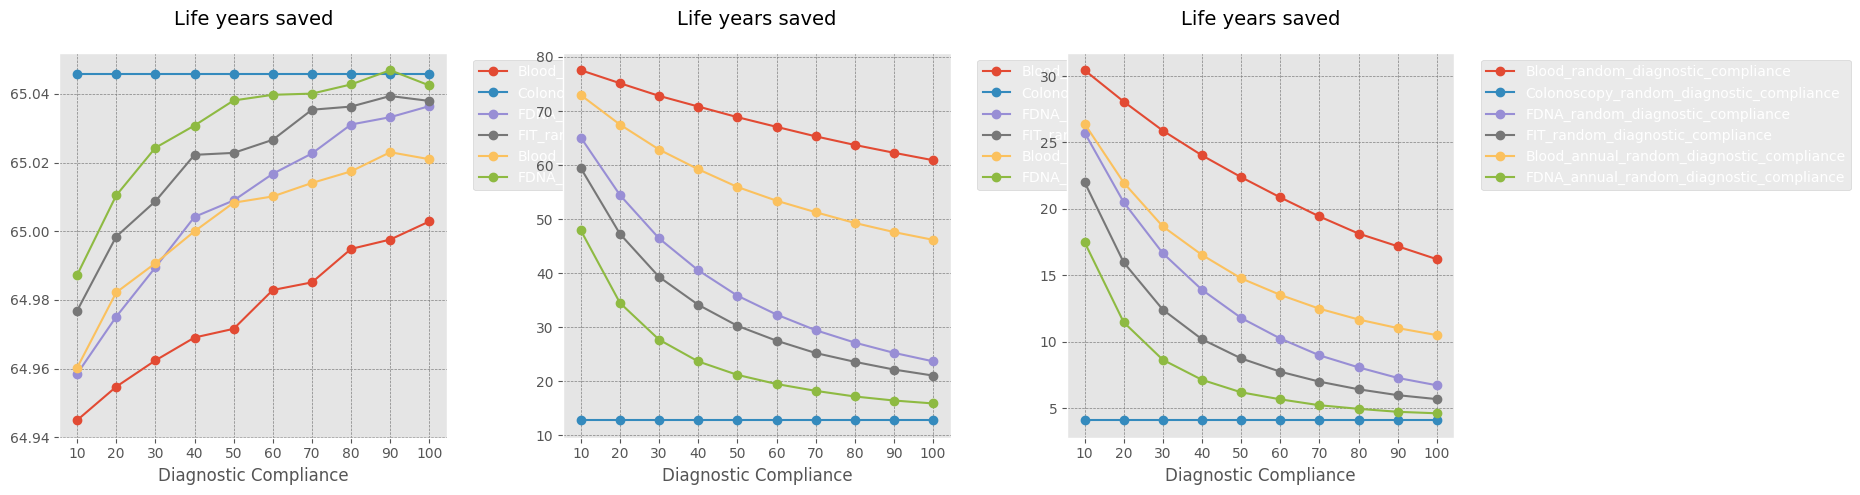

<Figure size 640x480 with 0 Axes>

In [69]:
# Define the screening scenarios
diagnostic_scenario_types = [
    'Blood_random_diagnostic_compliance', 'Colonoscopy_random_diagnostic_compliance',
    'FDNA_random_diagnostic_compliance', 'FIT_random_diagnostic_compliance',
    'Blood_annual_random_diagnostic_compliance', 'FDNA_annual_random_diagnostic_compliance' 
]

# Define the variables to plot
variables = [
    'discounted_lifeobs_if_unscreened_undiagnosed_at_40_mean',
    'clin_crc_per_1k_40yo_mean',
    'deadcrc_per_1k_40yo_mean'
]

# Create a figure and axis objects
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Create a custom range of compliance levels
compliance_levels = np.arange(10, 101, 10)

# Loop over the variables
for i, var in enumerate(variables):
    # Extract the relevant data
    data = df[df['scenario'].str.contains('|'.join(diagnostic_scenario_types))]

    # Plot the data
    ax = axes[i]
    for scenario in diagnostic_scenario_types:
        scenario_data = data[data['scenario'].str.contains(scenario)]
        scenario_compliance_levels = [float(s.split('_')[-1]) for s in scenario_data['scenario']]
        ax.plot(compliance_levels, np.interp(compliance_levels, scenario_compliance_levels, scenario_data[var]), marker='o', label=scenario)
    ax.set_xticks(compliance_levels)
    ax.set_title(title, fontsize=14, pad=20, color='black')
    ax.set_xlabel('Diagnostic Compliance')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True, linestyle='--', linewidth=0.5, color='grey')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)
plt.figure(facecolor='white')
# Display the plot
plt.show()